Name: Bohua Wu
Email: bohua@clemson.edu


# Clearly state the objective of the mini-project on Supervised Machine Learning

The objective: Analyze a heart attack dataset and use machine learning method to analyze the risk factors and build a prediction model on the risk of heart attack.

# Brief explanation about the data that you will be using: source, predictors, predictand 
Source:https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

Predictors:

    Age : Age of the patient  
    Sex : Sex of the patient     
    cp : Chest Pain type
    trtbps: resting blood pressure (in mm Hg)
    chol : cholestoral in mg/dl fetched via BMI sensor 
    fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    rest_ecg : resting electrocardiographic results 
          Value 0: normal 
          Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
          Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    thalach : maximum heart rate achieved
    exng:      exercise induced angina (1 = yes; 0 = no)
    oldpeak:    Previous peak
    slp:        Slope
    caa: number of major vessels (0-3)
    thall: Thal rate
    
predictand: output:Target variable (Heart attack), (1 = yes; 0 = no)

# Type of ML model output: Continuous or Classification?
The output is classification

In [1]:
#Importing librairies

import pandas as pd 
import numpy as np
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import graphviz
#%matplotlib inline

# 3 Read in the data

In [3]:
data = pd.DataFrame(pd.read_csv('heart.csv'))
data.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# 4 Clean & Standardized the input data if needed
No missing values, and does not need to be standardized

In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# 5 Split data to training/testing (You can also use Cross Validation if needed, not required)

In [7]:
features = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
X = data[features]
y = data['output']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=123)

# 6 You can use any Regularization (variable selection) or PCA if needed (not required)
  I examined the coefficients of features, and the coefficient value of all features are not high. I think I chose not regularization.

In [8]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error as mse

n_lambda = 100
lambdas = np.logspace(-2,6, n_lambda)

coefs = []

for ld in lambdas:
    ridgecv = RidgeCV(alphas = [ld], normalize = True)
    model_RR = ridgecv.fit(X_train, y_train)
    coefs.append(model_RR.coef_)

coef_df = pd.DataFrame(coefs)
coef_df.columns = X_train.columns

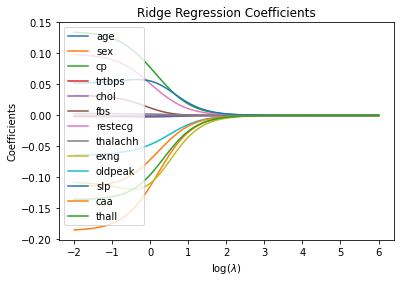

In [9]:
ax = plt.gca()
for i in range(0,coef_df.columns.size):
    ax.plot(np.log10(lambdas), coef_df.iloc[:,i])
    
ax.legend(coef_df.columns)
#ax.set_xscale('log')
plt.xlabel("log($\\lambda$)")
plt.ylabel('Coefficients')
plt.title('Ridge Regression Coefficients')
plt.axis('tight')
plt.show()

# 7 Construct Machine Learning model to training set and explain why do you want to use that algorithm 

Since the data has 13 features, I think random forest should be a good algorithm to analyze the dataset.

# Random Forest

In [10]:
model_RF = RandomForestClassifier(n_estimators=20,criterion="gini").fit(X_train,y_train)
#y_pred_RF = model_RF.predict(X_test)
#metrics.accuracy_score(y_test,y_pred_RF)
#print(metrics.accuracy_score(y_test,y_pred_RF))

# 8 Apply Machine Learning model to predict the output from testing set


In [11]:
y_pred_RF = model_RF.predict(X_test)

# 9 Evaluate the output using any of the given method in chapter 4


In [12]:
metrics.accuracy_score(y_test,y_pred_RF)

0.819672131147541

In [13]:
metrics.precision_recall_fscore_support(y_test,y_pred_RF,average='binary')

(0.8125, 0.8387096774193549, 0.8253968253968254, None)

In [14]:
kf10 = KFold(n_splits=10,shuffle=True,random_state=123)
for train_index, test_index in kf10.split(X):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]
    model_RF = RandomForestClassifier(n_estimators=20,criterion="gini").fit(X_train,y_train)
    y_pred_RF = model_RF.predict(X_test)
    metrics.accuracy_score(y_test,y_pred_RF)
    print(metrics.accuracy_score(y_test,y_pred_RF))

0.8387096774193549
0.7419354838709677
0.8709677419354839
0.7333333333333333
0.7666666666666667
0.9
0.8333333333333334
0.7333333333333333
0.7666666666666667
0.9333333333333333


In [15]:
auc_score = roc_auc_score(y_test,y_pred_RF)
print(auc_score)

0.9282296650717702


# 10 Confirm if your ML model is good or bad?

The accuracy score is 0.819672131147541.

precision score is 0.8125.

recall score is 0.7419354838709677.

F1 score is 0.8387096774193549.

AUC score is 0.8253968253968254.


I also evaluated the model with the fkold=10 cross validation, all the accuaracy score are higher than 0.7333.

Based on the output, the model of random forest has a high accuracy prediction score. It is reliable. 